In [1]:
import pandas as pd
# import numpy as np

In [2]:
weather = pd.read_excel('../../data/weather_seoul.xlsx', encoding='utf-8')
fine_dust = pd.read_excel('../../data/fine_dust_seoul.xlsx', encoding='utf-8')

In [3]:
weather

,평균 기온,최고기온,최저기온,상대습도,평균 풍속,강수량 합계
01월,-1.8,2.9,-5.8,54.6,2.3,14.9
02월,-0.2,4.8,-4.8,53.7,2.5,11.1
03월,6.3,12.3,1.7,48.1,2.4,7.9
04월,13.9,20.3,9.1,52.4,2.6,61.6
05월,19.5,25.4,14.4,52.2,2.4,16.1
06월,23.3,28.8,18.7,56.6,2.4,66.6
07월,26.9,30.4,24.3,77.2,2.0,621.0
08월,25.9,29.7,22.9,70.8,2.3,297.0
09월,22.1,27.4,17.5,60.9,2.0,35.0
10월,16.4,22.2,11.6,56.3,1.9,26.5


In [4]:
fine_dust

,미세먼지,초미세먼지
01월,27,30
02월,23,28
03월,32,39
04월,30,26
05월,29,24
06월,28,22
07월,27,22
08월,22,13
09월,23,19
10월,20,15


In [5]:
result = pd.concat([weather, fine_dust], axis=1)
result

,평균 기온,최고기온,최저기온,상대습도,평균 풍속,강수량 합계,미세먼지,초미세먼지
01월,-1.8,2.9,-5.8,54.6,2.3,14.9,27,30
02월,-0.2,4.8,-4.8,53.7,2.5,11.1,23,28
03월,6.3,12.3,1.7,48.1,2.4,7.9,32,39
04월,13.9,20.3,9.1,52.4,2.6,61.6,30,26
05월,19.5,25.4,14.4,52.2,2.4,16.1,29,24
06월,23.3,28.8,18.7,56.6,2.4,66.6,28,22
07월,26.9,30.4,24.3,77.2,2.0,621.0,27,22
08월,25.9,29.7,22.9,70.8,2.3,297.0,22,13
09월,22.1,27.4,17.5,60.9,2.0,35.0,23,19
10월,16.4,22.2,11.6,56.3,1.9,26.5,20,15


# 1. 일교차 구한 컬럼
# 2. 기온별 미세먼지 컬럼 >> 상관계수
# 3. 기온별 초미세먼지 컬럼 >> 상관계수
# 상관계수 셋팅 (있어보이게)

In [6]:
result['월교차'] =result['최고기온'] - result['최저기온']
result

,평균 기온,최고기온,최저기온,상대습도,평균 풍속,강수량 합계,미세먼지,초미세먼지,월교차
01월,-1.8,2.9,-5.8,54.6,2.3,14.9,27,30,8.7
02월,-0.2,4.8,-4.8,53.7,2.5,11.1,23,28,9.6
03월,6.3,12.3,1.7,48.1,2.4,7.9,32,39,10.6
04월,13.9,20.3,9.1,52.4,2.6,61.6,30,26,11.2
05월,19.5,25.4,14.4,52.2,2.4,16.1,29,24,11.0
06월,23.3,28.8,18.7,56.6,2.4,66.6,28,22,10.1
07월,26.9,30.4,24.3,77.2,2.0,621.0,27,22,6.1
08월,25.9,29.7,22.9,70.8,2.3,297.0,22,13,6.8
09월,22.1,27.4,17.5,60.9,2.0,35.0,23,19,9.9
10월,16.4,22.2,11.6,56.3,1.9,26.5,20,15,10.6


In [7]:
result.insert(3, '월교차2', result['월교차'])
result

,평균 기온,최고기온,최저기온,월교차2,상대습도,평균 풍속,강수량 합계,미세먼지,초미세먼지,월교차
01월,-1.8,2.9,-5.8,8.7,54.6,2.3,14.9,27,30,8.7
02월,-0.2,4.8,-4.8,9.6,53.7,2.5,11.1,23,28,9.6
03월,6.3,12.3,1.7,10.6,48.1,2.4,7.9,32,39,10.6
04월,13.9,20.3,9.1,11.2,52.4,2.6,61.6,30,26,11.2
05월,19.5,25.4,14.4,11.0,52.2,2.4,16.1,29,24,11.0
06월,23.3,28.8,18.7,10.1,56.6,2.4,66.6,28,22,10.1
07월,26.9,30.4,24.3,6.1,77.2,2.0,621.0,27,22,6.1
08월,25.9,29.7,22.9,6.8,70.8,2.3,297.0,22,13,6.8
09월,22.1,27.4,17.5,9.9,60.9,2.0,35.0,23,19,9.9
10월,16.4,22.2,11.6,10.6,56.3,1.9,26.5,20,15,10.6


In [8]:
del result['월교차']
result.rename(columns={result.columns[3]:'월교차'}, inplace=True)
result

,평균 기온,최고기온,최저기온,월교차,상대습도,평균 풍속,강수량 합계,미세먼지,초미세먼지
01월,-1.8,2.9,-5.8,8.7,54.6,2.3,14.9,27,30
02월,-0.2,4.8,-4.8,9.6,53.7,2.5,11.1,23,28
03월,6.3,12.3,1.7,10.6,48.1,2.4,7.9,32,39
04월,13.9,20.3,9.1,11.2,52.4,2.6,61.6,30,26
05월,19.5,25.4,14.4,11.0,52.2,2.4,16.1,29,24
06월,23.3,28.8,18.7,10.1,56.6,2.4,66.6,28,22
07월,26.9,30.4,24.3,6.1,77.2,2.0,621.0,27,22
08월,25.9,29.7,22.9,6.8,70.8,2.3,297.0,22,13
09월,22.1,27.4,17.5,9.9,60.9,2.0,35.0,23,19
10월,16.4,22.2,11.6,10.6,56.3,1.9,26.5,20,15


In [9]:
import numpy as np

In [10]:
np.corrcoef(result['평균 기온'], result['미세먼지'])

array([[ 1.        , -0.29290545],
       [-0.29290545,  1.        ]])

In [11]:
np.corrcoef(result['평균 기온'], result['초미세먼지'])

array([[ 1.       , -0.6973187],
       [-0.6973187,  1.       ]])

In [12]:
np.corrcoef(result['최고기온'], result['미세먼지'])

array([[ 1.        , -0.27490956],
       [-0.27490956,  1.        ]])

In [13]:
np.corrcoef(result['최저기온'], result['미세먼지'])

array([[ 1.        , -0.29562921],
       [-0.29562921,  1.        ]])

In [14]:
np.corrcoef(result['최저기온'], result['초미세먼지'])

array([[ 1.        , -0.69845534],
       [-0.69845534,  1.        ]])

In [15]:
np.corrcoef(result['최고기온'], result['초미세먼지'])

array([[ 1.        , -0.68105428],
       [-0.68105428,  1.        ]])

In [16]:
np.corrcoef(result['월교차'], result['초미세먼지'])

array([[1.       , 0.2084811],
       [0.2084811, 1.       ]])

In [17]:
np.corrcoef(result['월교차'], result['미세먼지'])

array([[1.       , 0.1769328],
       [0.1769328, 1.       ]])

In [18]:
np.corrcoef(result['상대습도'], result['미세먼지'])

array([[ 1.        , -0.40493175],
       [-0.40493175,  1.        ]])

In [19]:
np.corrcoef(result['상대습도'], result['초미세먼지'])

array([[ 1.        , -0.56867849],
       [-0.56867849,  1.        ]])

In [20]:
np.corrcoef(result['평균 풍속'], result['미세먼지'])

array([[1.        , 0.26876463],
       [0.26876463, 1.        ]])

In [21]:
np.corrcoef(result['평균 풍속'], result['초미세먼지'])

array([[1.        , 0.24856568],
       [0.24856568, 1.        ]])

In [22]:
np.corrcoef(result['강수량 합계'], result['미세먼지'])

array([[ 1.        , -0.11751175],
       [-0.11751175,  1.        ]])

In [23]:
np.corrcoef(result['강수량 합계'], result['초미세먼지'])

array([[ 1.        , -0.33755017],
       [-0.33755017,  1.        ]])

In [24]:
# 표 그리기
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import platform #os 정보를 가져 올 수 있는 모듈
from matplotlib import font_manager, rc # font_manager : 폰트 관리 모듈, rc : 폰트 변경 모듈
from matplotlib import pyplot as plt # 시각화 도구
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False # 유니코드 표현 설정하기
if platform.system() == 'Darwin':
 rc('font', family='AppleGothic') # OS가 APPLE(Darwin)이면 AppleGothic으로 폰트 설정
elif platform.system() == 'Windows':
 path="c:/Windows/Fonts/malgun.ttf" #OS가 윈도우즈면 맑은 고딕으로 설정
 font_name = font_manager.FontProperties(fname=path).get_name()
 rc('font', family=font_name)
else:
 print('Unknown System... sorry~~~~')

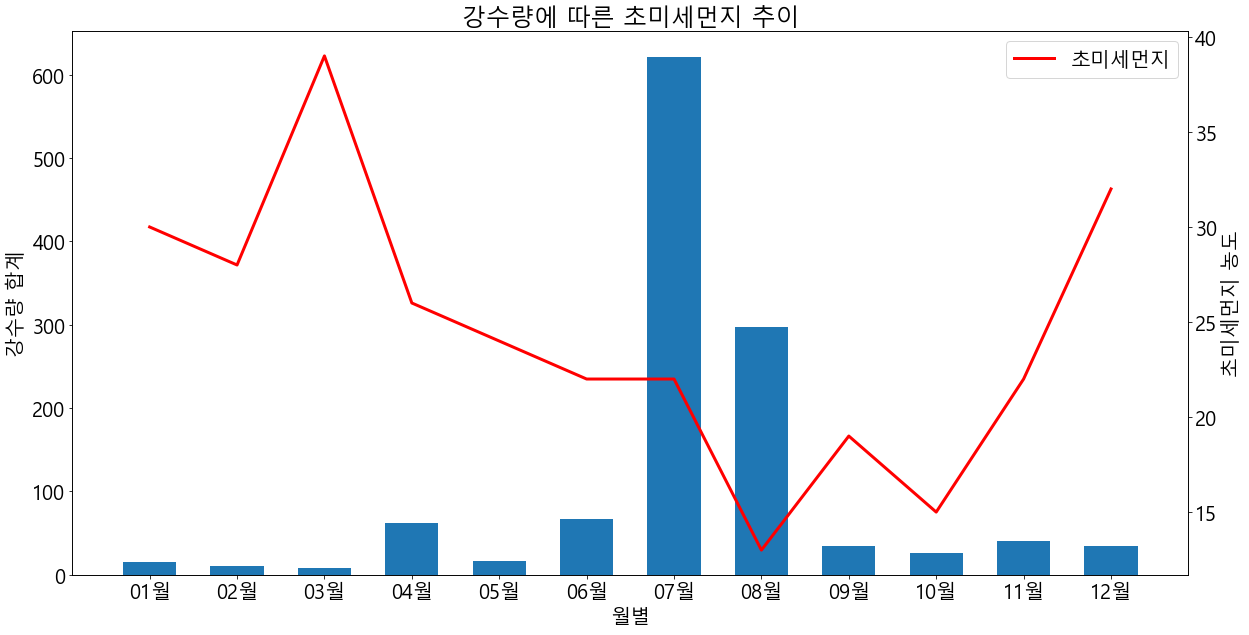

In [55]:
# 강수량
# 막대그래프(강수량 합계)
y = result['강수량 합계']
x = result.index
N = len(x)
width = 7 / 11.5
plt.bar(x, y, width)
plt.rcParams["figure.figsize"] = (20,10) # 그래프 사이즈
plt.rc('font', size=20)          # 글씨 크기
plt.xlabel('월별')
plt.ylabel('강수량 합계')

# 선그래프(미세먼지)
plt.twinx()
y2 = result['초미세먼지']
plt.plot(x, y2, color='red', lw=3)
plt.ylabel('초미세먼지 농도')

# common
plt.legend() # 범례 보여주기
plt.title('강수량에 따른 초미세먼지 추이')

plt.show()

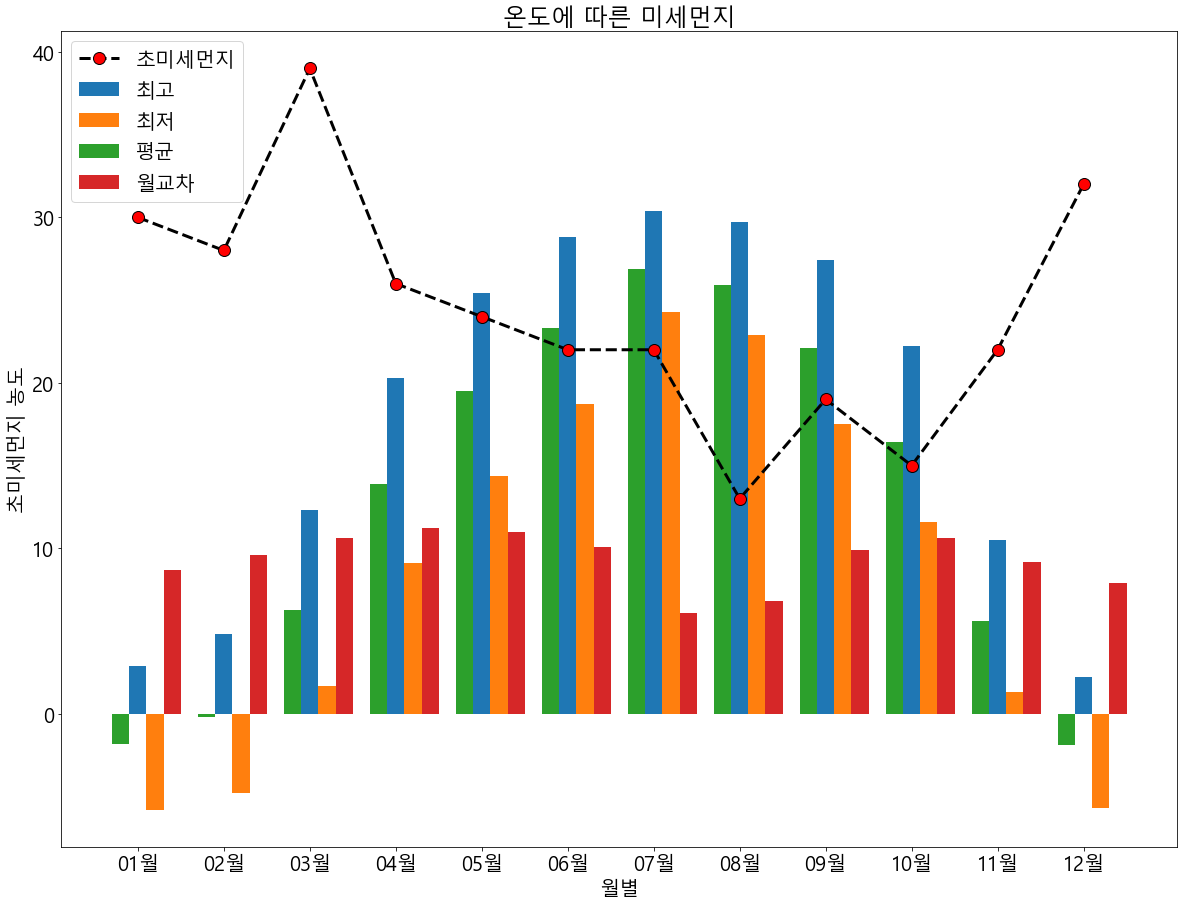

In [128]:
# 최고, 최저, 평균, 월교차에 따른 미세먼지

#y = result['강수량 합계']
#x = result.index
#N = len(x)
#width = 7 / 11.5
#plt.bar(x, y, width)
#plt.rcParams["figure.figsize"] = (20,10) # 그래프 사이즈
#plt.rc('font', size=20)          # 글씨 크기
#plt.xlabel('월별')
#plt.ylabel('강수량 합계')

#
plt.rcParams["figure.figsize"] = (20,15) # 그래프 사이즈

# 선그래프(미세먼지)
W_ = 0.2
x = result.index
width = 7 / 11.5
data1 = result['최고기온']
plt.bar(range(len(x)), data1, width=W_,  label='최고')

data2 = result['최저기온']
plt.bar([i+W_ for i in range(len(x))], data2, width=W_, label='최저')

data3 = result['평균 기온']
plt.bar([(i-W_) for i in range(len(x))], data3, width=W_,  label='평균')

data4 = result['월교차']
plt.bar([(i+W_)+W_ for i in range(len(x))], data4, width=W_,  label='월교차')

plt.xlabel('월별')
plt.ylabel('온도(℃)')

#
#plt.twinx()  #범례보여주기에 방해
y2 = result['초미세먼지']
plt.plot(x, y2, color='black', lw=3, linestyle='dashed', marker='o', markerfacecolor='red', markersize=12)
plt.ylabel('초미세먼지 농도')

# common
plt.legend(loc=0) # 범례 보여주기
plt.title('온도에 따른 미세먼지')

plt.show()

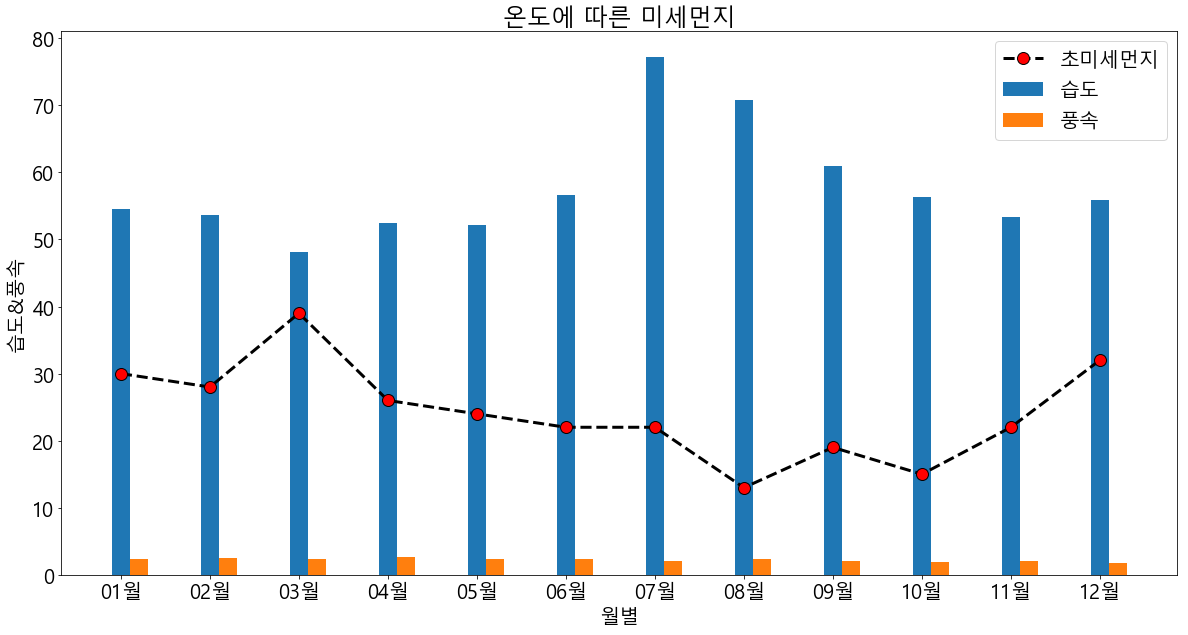

In [129]:
# 최고, 최저, 평균, 월교차에 따른 미세먼지

#y = result['강수량 합계']
#x = result.index
#N = len(x)
#width = 7 / 11.5
#plt.bar(x, y, width)
#plt.rcParams["figure.figsize"] = (20,10) # 그래프 사이즈
#plt.rc('font', size=20)          # 글씨 크기
#plt.xlabel('월별')
#plt.ylabel('강수량 합계')

#
plt.rcParams["figure.figsize"] = (20,10) # 그래프 사이즈

# 선그래프(미세먼지)
W_ = 0.2
x = result.index
width = 7 / 11.5
data1 = result['상대습도']
plt.bar(range(len(x)), data1, width=W_,  label='습도')

data2 = result['평균 풍속']
plt.bar([i+W_ for i in range(len(x))], data2, width=W_, label='풍속')

plt.xlabel('월별')
plt.ylabel('습도&풍속')

#
#plt.twinx()  #범례보여주기에 방해
y2 = result['초미세먼지']
plt.plot(x, y2, color='black', lw=3, linestyle='dashed', marker='o', markerfacecolor='red', markersize=12)

# common
plt.legend(loc=0) # 범례 보여주기
plt.title('온도에 따른 미세먼지')

plt.show()

#풍속은 관계없음